In [ ]:
pip install opencv-python

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from keras import regularizers
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 30
EPOCHS = 50
CHANNEL = 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/IT414_Project_Dataset/train',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2923 files belonging to 4 classes.


In [ ]:
labels = dataset.class_names
labels

['Closed', 'Open', 'no_yawn', 'yawn']

Closed


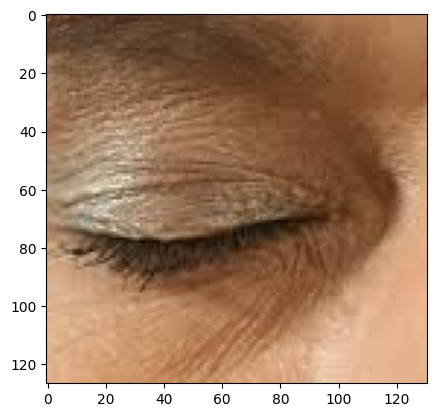

In [ ]:
plt.imshow(plt.imread("/content/drive/My Drive/IT414_Project_Dataset/train/Closed/_10.jpg"))
print('Closed')

Open


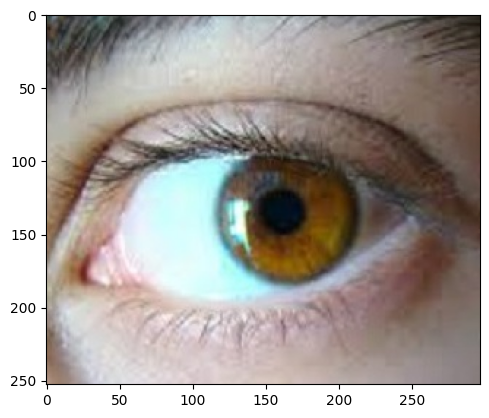

In [ ]:
plt.imshow(plt.imread("/content/drive/My Drive/IT414_Project_Dataset/train/Open/_10.jpg"))
print('Open')

yawn


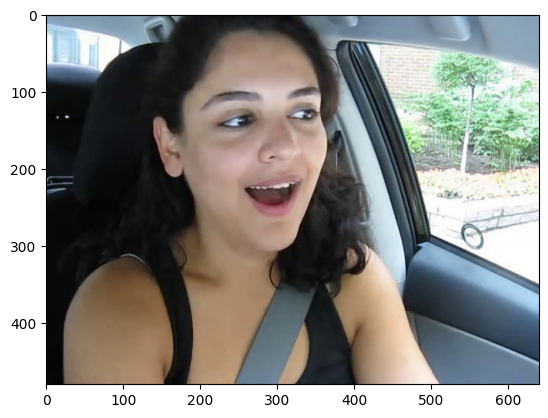

In [ ]:
plt.imshow(plt.imread("/content/drive/My Drive/IT414_Project_Dataset/train/yawn/50.jpg"))
print('yawn')

no_yawn


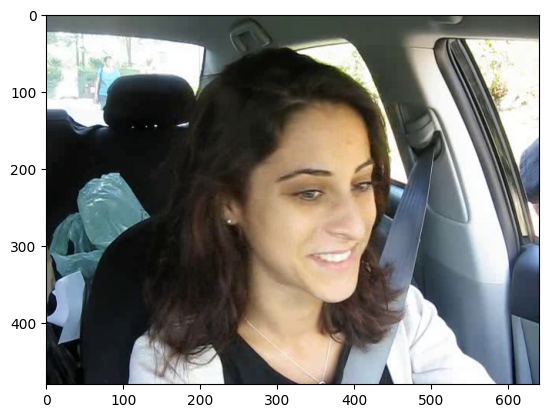

In [ ]:
plt.imshow(plt.imread("/content/drive/My Drive/IT414_Project_Dataset/train/no_yawn/1139.jpg"))
print('no_yawn')

In [ ]:
def face_for_yawn(direc_path1="/content/drive/My Drive/IT414_Project_Dataset/train",
                  face_path1="/content/drive/My Drive/prediction images/haarcascade_frontalface_default.xml"):
    data1 = []
    labels1 = ["yawn", "no_yawn"]
    for label in labels1:
        final_path1 = os.path.join(direc_path1, label)
        class_num1 = labels1.index(label)
        print(class_num1)
        for image in os.listdir(final_path1):
            image_array = cv2.imread(os.path.join(final_path1, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_path1)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, width, height) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+width, y+height), (0, 0, 255), 2)
                roi_color = img[y:y+height, x:x+width]
                resized_array = cv2.resize(roi_color, (IMAGE_SIZE, IMAGE_SIZE))
                data1.append([resized_array, class_num1])
    return data1


yawn_no_yawn = face_for_yawn()

0
1


In [ ]:
def open_closed_eye(direc_path2="/content/drive/My Drive/IT414_Project_Dataset/train",
             face_path2="/content/drive/My Drive/prediction images/haarcascade_frontalface_default.xml",
             eye_path="/content/drive/My Drive/prediction images/haarcascade.xml"):
    labels2 = ['Closed', 'Open']
    data2 = []
    for label in labels2:
        final_path2 = os.path.join(direc_path2, label)
        class_num2 = labels2.index(label)
        class_num2 +=2
        print(class_num2)
#         print(f'{label} means: {class_num2}')
        for img in os.listdir(final_path2):
                img_array = cv2.imread(os.path.join(final_path2, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                data2.append([resized_array, class_num2])
    return data2
open_closed = open_closed_eye()

2
3


In [ ]:
def extend_data():
    d1  =  face_for_yawn()
    d2  =  open_closed_eye()
    d1.extend(d2)
    return d1

In [ ]:
data = extend_data()

0
1
2
3


In [ ]:
len(data)

1931

In [ ]:
import random
random.shuffle(data)

In [ ]:
x = list()
y = list()

for features, label in data:
    x.append(features)
    y.append(label)

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
len(x)

1931

In [ ]:
len(y)

1931

In [ ]:
x.shape

(1931, 256, 256, 3)

In [ ]:
y.shape

(1931,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
x_train.shape

(1448, 256, 256, 3)

In [ ]:
x_test.shape

(483, 256, 256, 3)

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(x_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(x_test), y_test, shuffle=False)

In [ ]:
n_classes = 4

models = models.Sequential([

    layers.Conv2D(256, (3, 3), activation="relu", input_shape = x_train.shape[1:]),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])


In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
models.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = models.fit(
    train_generator,
    epochs = EPOCHS,
    verbose =1,
    shuffle = True,
    validation_data = test_generator
)

Epoch 1/50
46/46 [==============================] - 45s 644ms/step - loss: 0.9586 - accuracy: 0.5684 - val_loss: 0.5753 - val_accuracy: 0.7122
Epoch 2/50
46/46 [==============================] - 28s 599ms/step - loss: 0.4293 - accuracy: 0.8260 - val_loss: 0.3736 - val_accuracy: 0.8240
Epoch 3/50
46/46 [==============================] - 27s 593ms/step - loss: 0.3746 - accuracy: 0.8522 - val_loss: 0.3171 - val_accuracy: 0.8716
Epoch 4/50
46/46 [==============================] - 27s 580ms/step - loss: 0.3157 - accuracy: 0.8750 - val_loss: 0.3071 - val_accuracy: 0.8489
Epoch 5/50
46/46 [==============================] - 27s 582ms/step - loss: 0.3124 - accuracy: 0.8757 - val_loss: 0.2641 - val_accuracy: 0.8923
Epoch 6/50
46/46 [==============================] - 27s 577ms/step - loss: 0.2639 - accuracy: 0.8978 - val_loss: 0.2199 - val_accuracy: 0.9193
Epoch 7/50
46/46 [==============================] - 27s 588ms/step - loss: 0.2304 - accuracy: 0.9095 - val_loss: 0.2071 - val_accuracy: 0.9296

In [ ]:
scores = models.evaluate(test_generator)
loss, accuracy = scores

16/16 [==============================] - 1s 71ms/step - loss: 0.1179 - accuracy: 0.9586


In [ ]:
print("Accuracy of model is : ",accuracy*100)
print("Loss of model is : ",loss*100)

Accuracy of model is :  95.85921168327332
Loss of model is :  11.790841817855835


In [ ]:
accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Accuracy')

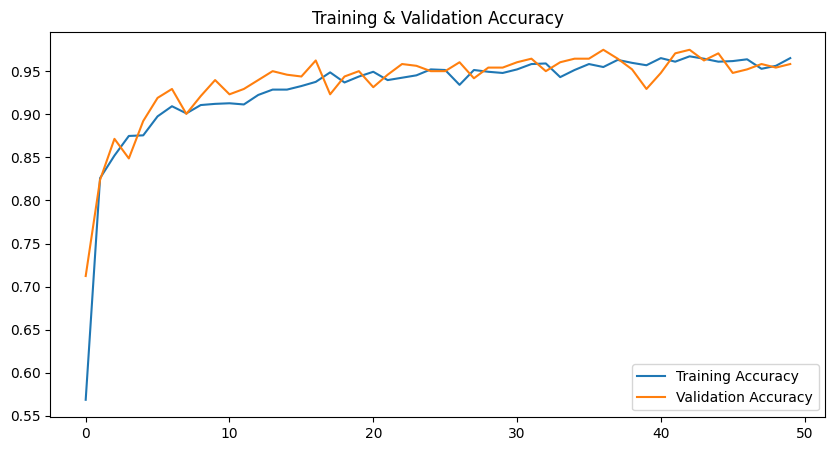

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)

plt.plot(range(EPOCHS),accu,label="Training Accuracy")
plt.plot(range(EPOCHS),val_accu,label="Validation Accuracy")

plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

Text(0.5, 1.0, 'Training & Validation Loss')

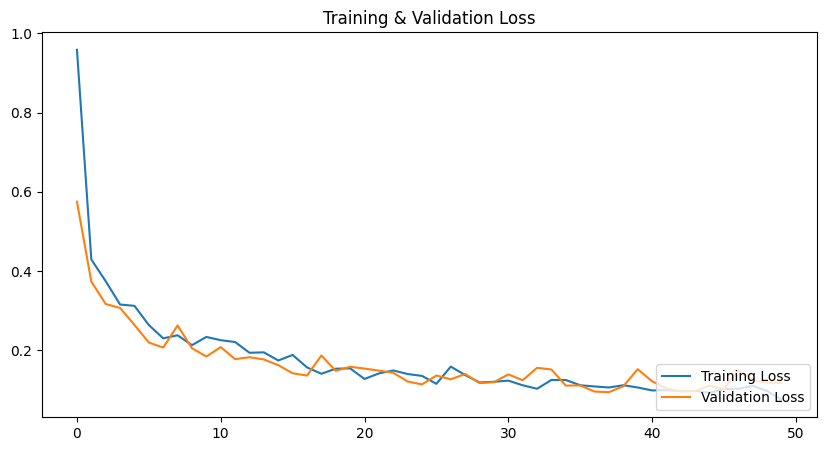

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)

plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")

plt.legend(loc='lower right')
plt.title('Training & Validation Loss')

In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0